In [1]:
import sys
sys.path.append('../')

In [2]:
from deepracer.tracks import TrackIO, Track

from deepracer.logs import \
    AnalysisUtils as au, \
    SimulationLogsIO as slio, \
    EvaluationUtils as eu, \
    PlottingUtils as pu,\
    NewRewardUtils as nr \

Loaded 71 waypoints


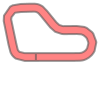

In [3]:
tu = TrackIO(base_path='../tracks')
track: Track = tu.load_track("reinvent_base")

track.road_poly

In [21]:
eval_fname = '../logs/evaluation-simulation-logs-y1.log'
eval_df = slio.load_pandas(eval_fname)
eval_df = eval_df.rename(columns={'track_len':'track_length'}) 
eval_df['track_width'] = 0.76
eval_df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_length,timestamp,track_width
0,1,2,399,2.6339,0.8130,8.6039,-30.0,0.33,0.0,0.5,0,True,98.4379,69,17.67,1591654452.1265216,0.76
1,1,2,400,2.6692,0.8136,6.9201,-30.0,0.33,0.0,0.5,0,True,98.6374,69,17.67,1591654452.1930513,0.76
2,1,2,401,2.6971,0.8127,5.3165,0.0,0.67,4.0,0.5,0,True,98.7958,69,17.67,1591654452.262649,0.76
3,1,2,402,2.7303,0.8104,3.3965,-30.0,0.67,1.0,0.5,0,True,98.9832,69,17.67,1591654452.329692,0.76
4,1,2,403,2.7729,0.8053,0.6813,30.0,0.33,6.0,0.5,0,True,99.2245,69,17.67,1591654452.3959208,0.76


In [11]:
nr.new_reward(eval_df, track.center_line, 'reward') #, verbose=True)

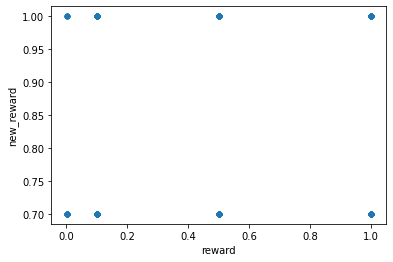

In [12]:
eval_df.plot(x='reward',y='new_reward',kind='scatter')

In [13]:
from reward import AWSReward, RewardFactory
factory = RewardFactory(AWSReward)
factory.print_available_reward_classes()

['RewardZ2', 'RewardZ3', 'RewardZ1', 'RewardZ4', 'RewardZ4_2', 'RewardZ5', 'RewardZ6', 'RewardZ7', 'RewardY1', 'RewardY2', 'RewardX1', 'RewardW6', 'RewardW5', 'RewardW4', 'RewardW3', 'RewardW2']


In [14]:
params = {}
w6 = factory.build('RewardW6',params)
float(w6)

AttributeError: 'RewardW6' object has no attribute 'track_width'

In [18]:
# This util has a very complicated way to get a reward function
nr.new_reward??

In [19]:
#this util is missing some parameters and hardcoding others
nr.df_to_params??

In [25]:
def new_reward(df, factory, center_line, reward_name='RewardX1',missing_params=None):
        new_rewards = []
        for _, row in df.iterrows():
            params = nr.df_to_params(row, center_line)
            if missing_params:
                params.update(missing_params)
            rw = factory.build(reward_name,params)
            new_rewards.append( float(rw) )

        df[reward_name] = new_rewards

In [26]:
missing_params = {'track_width': 0.76, 'track_length': 17.67}
new_reward(eval_df,factory,track.center_line,reward_name='RewardW6',missing_params=missing_params)

In [27]:
eval_df.head()

,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_length,timestamp,track_width,RewardW6
0,1,2,399,2.6339,0.8130,8.6039,-30.0,0.33,0.0,0.5,0,True,98.4379,69,17.67,1591654452.1265216,0.76,0.641
1,1,2,400,2.6692,0.8136,6.9201,-30.0,0.33,0.0,0.5,0,True,98.6374,69,17.67,1591654452.1930513,0.76,0.641
2,1,2,401,2.6971,0.8127,5.3165,0.0,0.67,4.0,0.5,0,True,98.7958,69,17.67,1591654452.262649,0.76,0.801
3,1,2,402,2.7303,0.8104,3.3965,-30.0,0.67,1.0,0.5,0,True,98.9832,69,17.67,1591654452.329692,0.76,0.641
4,1,2,403,2.7729,0.8053,0.6813,30.0,0.33,6.0,0.5,0,True,99.2245,69,17.67,1591654452.3959208,0.76,0.641
